<a href="https://colab.research.google.com/github/edleafvirtual/Iowa_Liquor_Sales/blob/main/Part_B--ML_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A. Project Name:  Iowa Liquor Sales (Part B).
- **Student Name:** Eduardo Galindez.
- **Coding Dojo Bootcamp:** Data Science.
  - **Stack:** Advanced Machine Learning.
- **Date:** August, 2022.

#B. Project Objective

Prepare the data for Machine Learning to predict [Iowa Alcoholic Beverages Division 2022](https://abd.iowa.gov/) income from Class E alcohol liquor sales across licensed vendors using 2021 data from [Iowa Liquor Sales](https://console.cloud.google.com/marketplace/product/iowa-department-of-commerce/iowa-liquor-sales?project=lively-clover-358509).

#C. Project Statement

- In Part A, Section 6, we described the reasons why we had identified the column 'Volume Sold (Gallons)' as a Target. Hence in this part of the project, we are going to be working on our predictive modeling using Linear Regression, Decision Tree, and Random Forest prediction models.
- In Section 4 we are not going to get deep inside outliers from numerical columns, because all that research was made on Part A.

#D. Project Development

##1.- Libraries

In [1]:
# Importing libraries.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import set_config
set_config(display='diagram')

##2.-  Loading Data

In [2]:
# Mount data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load data from 2019.
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo Classes/2. Machine Learning/Week 4/2021_Iowa_Liquor_Sales.csv')


###2.2.- Data dictionary

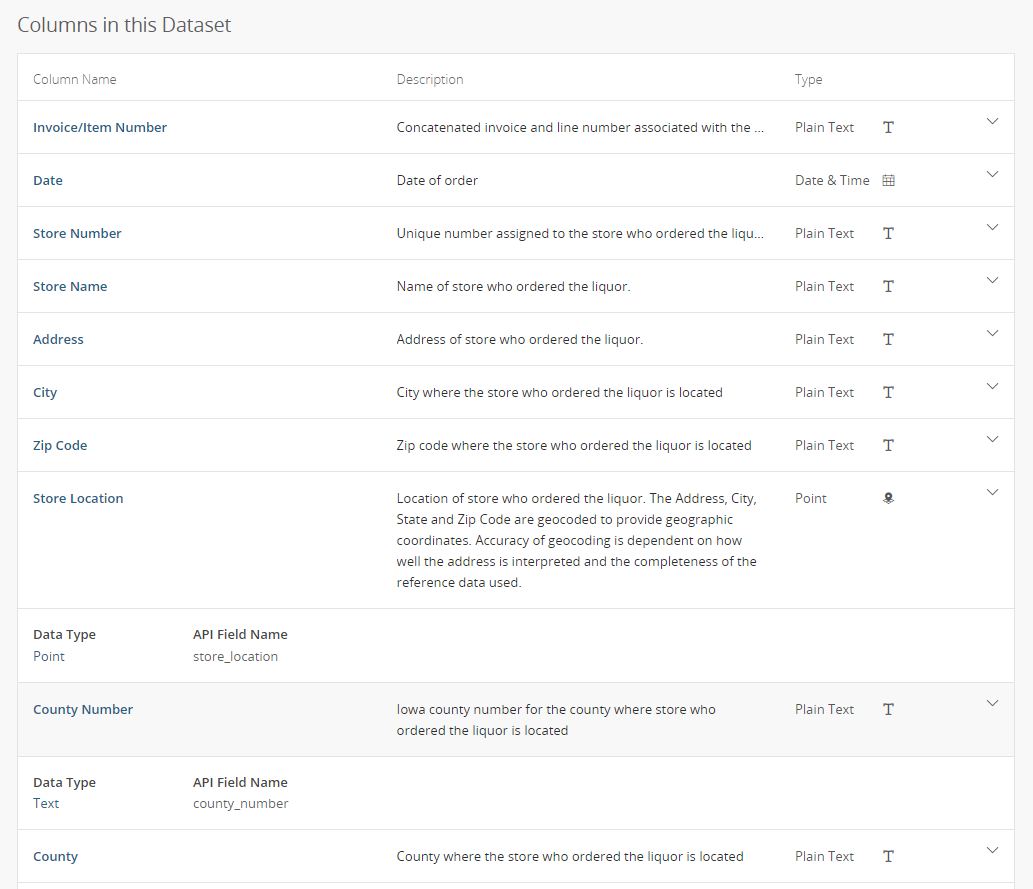


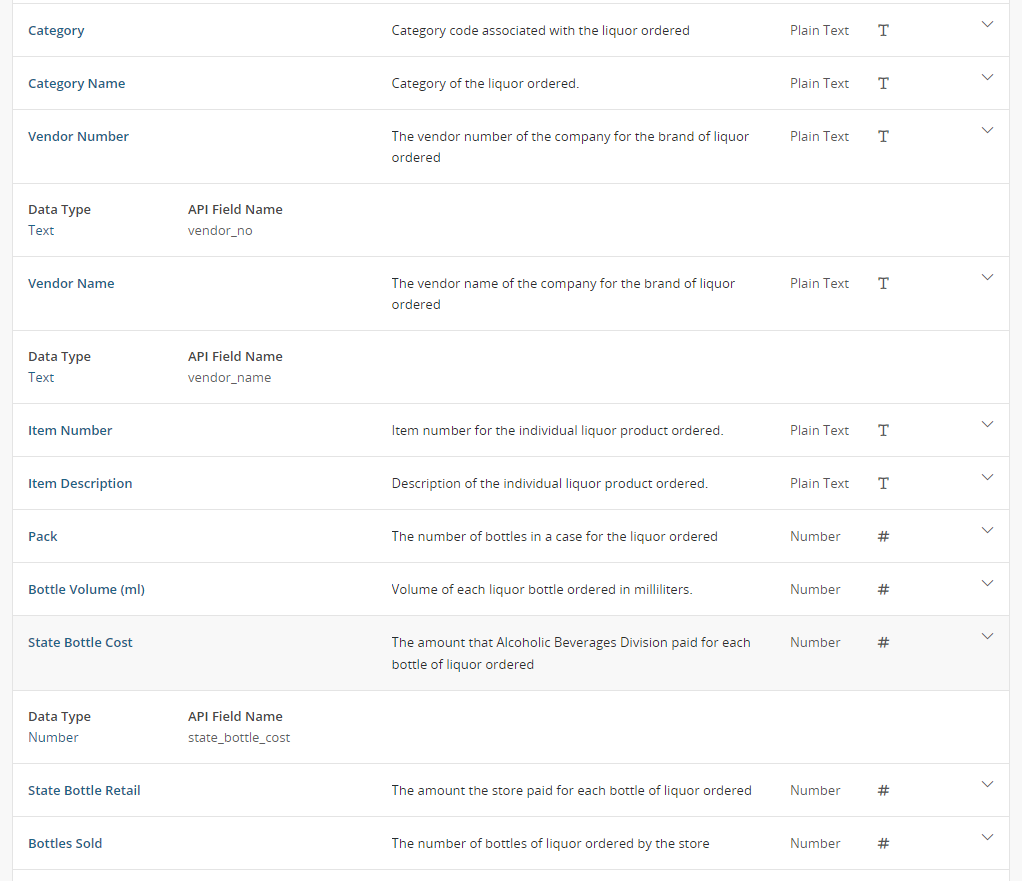

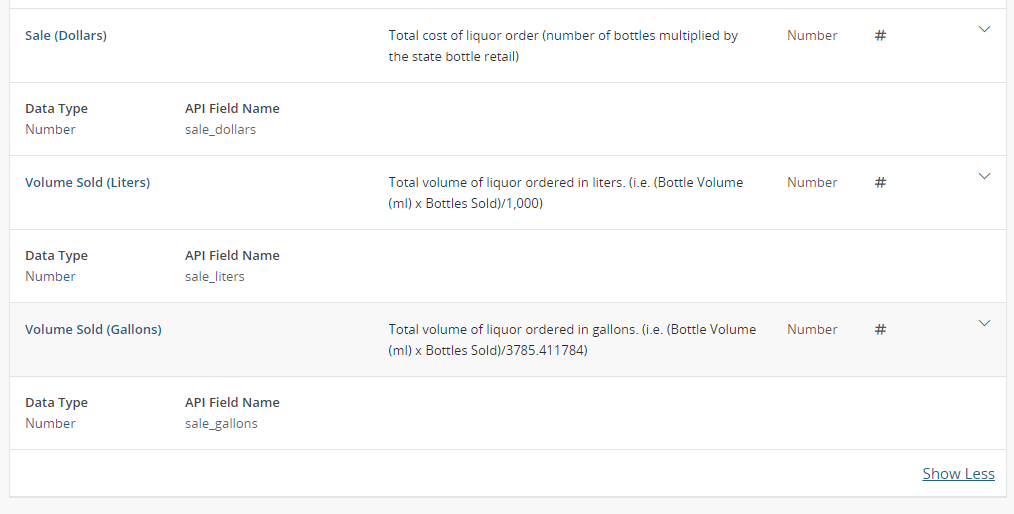

##3.- Data Understanding

In [4]:
# Let's see the general information of our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622712 entries, 0 to 2622711
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice/Item Number    object 
 1   Date                   object 
 2   Store Number           int64  
 3   Store Name             object 
 4   Address                object 
 5   City                   object 
 6   Zip Code               float64
 7   Store Location         object 
 8   County Number          float64
 9   County                 object 
 10  Category               int64  
 11  Category Name          object 
 12  Vendor Number          float64
 13  Vendor Name            object 
 14  Item Number            int64  
 15  Item Description       object 
 16  Pack                   int64  
 17  Bottle Volume (ml)     int64  
 18  State Bottle Cost      float64
 19  State Bottle Retail    float64
 20  Bottles Sold           int64  
 21  Sale (Dollars)         float64
 22  Volume Sold (Liter

In [5]:
# Looking for unique values per variable.
df.nunique()

Invoice/Item Number      2622712
Date                         300
Store Number                1948
Store Name                  1943
Address                     1929
City                         442
Zip Code                     479
Store Location              2558
County Number                 99
County                       119
Category                      57
Category Name                 57
Vendor Number                220
Vendor Name                  224
Item Number                 4472
Item Description            3956
Pack                          21
Bottle Volume (ml)            24
State Bottle Cost           1301
State Bottle Retail         1304
Bottles Sold                 389
Sale (Dollars)             10846
Volume Sold (Liters)         758
Volume Sold (Gallons)        747
dtype: int64

In [6]:
# Let's check the statistical summary.
df.describe().round(2)

,Store Number,Zip Code,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,2622712.00,2622570.00,2622570.00,2622712.00,2622708.00,2622712.00,2622712.00,2622712.00,2622712.00,2622712.00,2622712.00,2622712.00,2622712.00,2622712.00
mean,4133.77,51242.78,57.13,1055979.86,286.37,54360.41,11.94,821.82,11.32,16.98,11.90,163.24,9.44,2.49
std,1263.05,990.60,27.34,103944.19,141.85,90958.45,7.85,525.66,11.05,16.57,35.27,577.08,41.00,10.83
min,2106.00,50002.00,1.00,1011000.00,33.00,258.00,1.00,20.00,0.66,0.99,1.00,1.34,0.02,0.00
25%,2644.00,50314.00,31.00,1012100.00,205.00,27125.00,6.00,375.00,6.00,9.00,3.00,42.00,1.50,0.39
50%,4184.00,51040.00,62.00,1031200.00,260.00,39916.00,12.00,750.00,8.99,13.49,6.00,89.28,4.50,1.18
75%,5239.00,52302.00,77.00,1062500.00,420.00,65204.00,12.00,1000.00,14.00,21.00,12.00,166.50,10.50,2.77
max,9049.00,57222.00,99.00,1901200.00,978.00,999993.00,120.00,5250.00,2098.94,3148.41,13200.00,250932.00,13200.00,3487.07


In [7]:
# Looking for missing data.
df.isna().sum()

Invoice/Item Number           0
Date                          0
Store Number                  0
Store Name                    0
Address                     142
City                        142
Zip Code                    142
Store Location           311710
County Number               142
County                      142
Category                      0
Category Name                 0
Vendor Number                 4
Vendor Name                   4
Item Number                   0
Item Description              0
Pack                          0
Bottle Volume (ml)            0
State Bottle Cost             0
State Bottle Retail           0
Bottles Sold                  0
Sale (Dollars)                0
Volume Sold (Liters)          0
Volume Sold (Gallons)         0
dtype: int64

In [8]:
df.isna().sum().sum()

312428

In [9]:
# Let's identify duplicate data.
df.duplicated().sum()

0

**Observations:**
- We must keep in mind that the project objective is to predict the sales (Gallons) for 2022. For this reason, we decided to drop the columns we consider don't affect the sales:
  - Invoice/Item Number.
  - Pack.
  - Store Number.
  - Store Name.
  - City.
  - Address.
  - Zip Code.
  - Store Location.
  - Category.
  - Category Name.
  - Vendor Name.
  - County Number.
  - Vendor Number.
  - Item Number.
  - Item Description. It's a variable that could affect the sales from a consumer point of view, but like in this case we are focusing on the global sales instead per product, this column will be dropped too.

- According to the code above, our current dataset has:
  - 2,622,712 rows and 24 columns.
  - Around 12% of missing data (312,428).
    - The majority of the missing data is located in rows that will be drop.
    - The good new is that we don't have missing data on target column 'Volume Sold (Gallons)'.
  - 0 duplicate data.
    - Duplicate data is a value that won't be calculated on future code because after eliminating unique elements, the probability to have rows with equal values is high.
- We haven't looked for inconsistencies on dtype object columns until we drop unnecessary features.

##4.- Data Cleaning
- In this section, we are going to prepare the data to have it clean and ready for the split between Features (X) and Target (y).

In [10]:
# Drop unnecessary columns.
df.drop(columns = ['Invoice/Item Number', 'Store Number', 'Pack',
                   'City', 'Category Name', 'Vendor Name',
                   'Store Name', 'Address', 'Zip Code',
                   'Store Location', 'Category', 'County Number',
                   'Vendor Number', 'Item Number', 'Item Description'],
        inplace = True)
df.head(5)

,Date,County,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,01/04/2021,MUSCATINE,750,13.50,20.25,3,60.75,2.25,0.59
1,01/04/2021,IOWA,50,7.35,11.03,4,44.12,0.20,0.05
2,01/04/2021,POLK,750,16.00,24.00,6,144.00,4.50,1.18
3,01/04/2021,POLK,50,8.50,12.75,3,38.25,0.15,0.03
4,01/04/2021,BENTON,1750,11.29,16.94,3,50.82,5.25,1.38


In [11]:
# Looking for missing data.
df.isna().sum()

Date                       0
County                   142
Bottle Volume (ml)         0
State Bottle Cost          0
State Bottle Retail        0
Bottles Sold               0
Sale (Dollars)             0
Volume Sold (Liters)       0
Volume Sold (Gallons)      0
dtype: int64

In [12]:
df.isna().sum().sum()

142

In [13]:
# Let's have a closer look in 'County'.
df.groupby('County').agg(value_count=('County','count')).sort_values(by=['County','value_count'], ascending=[True,False])

,value_count
County,
ADAIR,4323
ADAMS,2549
ALLAMAKEE,9847
APPANOOSE,7804
AUDUBON,3750
...,...
WOODBURY,86407
WORTH,3962
WRIGHT,7713


In [14]:
# Let's see the general information of our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622712 entries, 0 to 2622711
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   County                 object 
 2   Bottle Volume (ml)     int64  
 3   State Bottle Cost      float64
 4   State Bottle Retail    float64
 5   Bottles Sold           int64  
 6   Sale (Dollars)         float64
 7   Volume Sold (Liters)   float64
 8   Volume Sold (Gallons)  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 180.1+ MB


**Observations:**
- According to the code above:
  - Missing data:
    - In total, we have around ~ 0.005% missing data. We have decided to drop them because of the minimal impact on our dataset.
  - Inconsistencies in categorical features:
    - In 'County', some words are capitalized and some are not.
    - Also we identified misspellings in two counties.
  - Data type:
    - Column 'Date' dtype will be changed into datetime for feature engineering purposes.
- All the issues pointed will be addressed in code below.

In [15]:
# Let's follow the procedure indicated above.
df.dropna(inplace=True)

In [16]:
# Confirm there is not missing data.
df.isna().sum().sum()

0

In [17]:
# Let's address the inconsistencies found in 'County'.
df['County'] = df['County'].str.upper()

In [18]:
# Let's address the misspelings found in 'County'.
county_name_fix = {"CERRO GORD": 'CERRO GORDO',
            'POTTAWATTA': 'POTTAWATTAMIE',
            'BUENA VIST': 'BUENA VISTA'}

df['County'] = df['County'].replace(county_name_fix)

In [19]:
# Now, let's address dtype modification.
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2622570 entries, 0 to 2622711
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   County                 object        
 2   Bottle Volume (ml)     int64         
 3   State Bottle Cost      float64       
 4   State Bottle Retail    float64       
 5   Bottles Sold           int64         
 6   Sale (Dollars)         float64       
 7   Volume Sold (Liters)   float64       
 8   Volume Sold (Gallons)  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 200.1+ MB


**Conclusions about data cleaning process:**
- Our dataset has been reduced to 9 columns.
- Column 'Date' will be deleted during Section 5.
- So far, our dataset is ready to bu used for Machine Learning.

##5.- Feature Engineering
- In this section, we are going to generate 4 new features through the engineering process, splitting 'Date' column. With this approach, we are going to allow our models to interact with Year, Quarter, Month, and Week in order to simplify and speed up data transformations, and also enhance models accuracy.


In [20]:
# Year of the 'Date'.
df['Year'] = df['Date'].dt.year.astype('object')

In [21]:
# Per Quarter of the Year.
df['Quarter'] = df['Date'].dt.quarter.astype('object')

In [22]:
# Month of the Year.
df['Month'] = df['Date'].dt.month.astype('object')

In [23]:
# Week of the Year.
df['Week'] = df['Date'].dt.isocalendar().week.astype('object')

In [24]:
# Drop 'Date' column as is not needed anymore.
df = df.drop(columns='Date')

In [25]:
# Let's check dtype for feature updates.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2622570 entries, 0 to 2622711
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   County                 object 
 1   Bottle Volume (ml)     int64  
 2   State Bottle Cost      float64
 3   State Bottle Retail    float64
 4   Bottles Sold           int64  
 5   Sale (Dollars)         float64
 6   Volume Sold (Liters)   float64
 7   Volume Sold (Gallons)  float64
 8   Year                   object 
 9   Quarter                object 
 10  Month                  object 
 11  Week                   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 260.1+ MB


In [26]:
# Before moving forward, let's display how our dataset looks.
df.head()

,County,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Year,Quarter,Month,Week
0,MUSCATINE,750,13.50,20.25,3,60.75,2.25,0.59,2021,1,1,1
1,IOWA,50,7.35,11.03,4,44.12,0.20,0.05,2021,1,1,1
2,POLK,750,16.00,24.00,6,144.00,4.50,1.18,2021,1,1,1
3,POLK,50,8.50,12.75,3,38.25,0.15,0.03,2021,1,1,1
4,BENTON,1750,11.29,16.94,3,50.82,5.25,1.38,2021,1,1,1


##6.- Data Preparation for Machine Learning
- In this section, we are going to be implementing methods in order to prevent data leakage.
- Because our dataset has +2M rows, the notebook that we are using is going to collapse (meaning that is too large to fit in memory). For this reason, we have decided to work with a sample of 25% (655,678 rows).

In [27]:
# Data sampling.
df_sample = df.sample(frac=0.25, random_state=42)

In [28]:
# Define features and target.
X = df_sample.drop(columns='Volume Sold (Gallons)')
y = df_sample['Volume Sold (Gallons)']

In [29]:
# Train test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
# Instantiate the selectors.
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [31]:
# Instantiate the transformers.
mean_imputer = SimpleImputer(strategy='mean') 
mode_imputer = SimpleImputer(strategy='most_frequent')

In [32]:
# Instantiate numeric pipeline.
num_pipeline = make_pipeline(mode_imputer, StandardScaler())
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('standardscaler', StandardScaler())])

In [33]:
# Instantiate categorical pipeline.
cat_pipeline = make_pipeline(mode_imputer, OneHotEncoder(handle_unknown='ignore', sparse=False))
cat_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [34]:
# Tuples for Column Transformer.
num_tuple = (num_pipeline, num_selector)
cat_tuple = (cat_pipeline, cat_selector)

In [35]:
# Instantiate Column Transformer.
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f55d862f410>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f55d862fdd0>)])

In [36]:
# Fit Column Transformer on train (X).
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f55d862f410>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f55d862fdd0>)])

In [37]:
# Transform train and test data.
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [38]:
# Display results.
print('\033[1mX_train_processed:\033[0;0m', len(X_train_processed), 'rows - This represents ~75% of the sampled dataset.')
print('\033[1mX_test_processed:\033[0;0m', len(X_test_processed), 'rows - This represents ~25% of the sampled dataset.')

X_train_processed: 491731 rows - This represents ~75% of the sampled dataset.
X_test_processed: 163911 rows - This represents ~25% of the sampled dataset.


##7.- Predictive Modeling
- The models we are going to be developing in this sections are:
 1. Linear Regression.
 2. Decision Tree.
 3. Random Forest.

###7.1.- Linear Regression
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [39]:
# Create pipeline.
lin_reg = make_pipeline(StandardScaler(), LinearRegression())

In [40]:
# Let's fit the model.
lin_reg.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

**Model Evaluation:**

In [41]:
# Using R^2 metric.
lin_reg_train_r2 = r2_score(y_train, lin_reg.predict(X_train_processed)).round(4)
lin_reg_test_r2 = r2_score(y_test, lin_reg.predict(X_test_processed)).round(4)

In [42]:
# Using MAE metric.
lin_reg_train_MAE = mean_absolute_error(y_train, lin_reg.predict(X_train_processed)).round(4)
lin_reg_test_MAE = mean_absolute_error(y_test, lin_reg.predict(X_test_processed)).round(4)

In [43]:
# Using MSE metric.
lin_reg_train_MSE = mean_squared_error(y_train, lin_reg.predict(X_train_processed)).round(4)
lin_reg_test_MSE = mean_squared_error(y_test, lin_reg.predict(X_test_processed)).round(4)

In [44]:
# Using RMSE metric.
lin_reg_train_RMSE = np.sqrt(lin_reg_train_MSE).round(4)
lin_reg_test_RMSE = np.sqrt(lin_reg_test_MSE).round(4)

In [45]:
# Formating results.

# Initialize data of lists.
lin_reg_metrics = {'Method': ['Training R^2', 'Test R^2',
                   'Training MAE', 'Test MAE',
                   'Training MSE', 'Test MSE',
                   'Training RMSE', 'Test RMSE'],
        'Volume Sold (Gallons)': [lin_reg_train_r2, lin_reg_test_r2,
                lin_reg_train_MAE, lin_reg_test_MAE,
                lin_reg_train_MSE, lin_reg_test_MSE,
                lin_reg_train_RMSE, lin_reg_test_RMSE]}
  
# Create DataFrame.
lin_reg_metrics_df = pd.DataFrame(lin_reg_metrics)
  
# Print the output.
print('Our predicted Volume Sold (Gallons) based on the features selected using Linear Regression are:\n')
lin_reg_metrics_df.round(4)

Our predicted Volume Sold (Gallons) based on the features selected using Linear Regression are:



,Method,Volume Sold (Gallons)
0,Training R^2,1.000
1,Test R^2,1.000
2,Training MAE,0.002
3,Test MAE,0.002
4,Training MSE,0.000
5,Test MSE,0.000
6,Training RMSE,0.000
7,Test RMSE,0.000


**Observations:**
- According to our R^2 results (1.0 for both data sets), our model does not need to be tuned. However, in Coding Dojo Learn Platform we were asked to tuned our model, so in this case we are going to add another model to our list (SGDRegressor).
- Keeping in mind the average gallons sold is 2.49, this model is off by about 0.08% according to MAE results.

####7.1.1.- Stochastic Gradient Descent Regressor
- Linear model fitted by minimizing a regularized empirical loss with [SGD](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html).
- This model was chosen because our sampled data is [larger](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) than 100,000 samples.

In [46]:
# Create pipeline.
sgd_reg_simple = make_pipeline(StandardScaler(), SGDRegressor(random_state=42))

In [47]:
# Let's fit the model.
sgd_reg_simple.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(random_state=42))])

**Model Evaluation:**

In [48]:
# Using R^2 metric.
sgd_reg_train_r2_simple = r2_score(y_train, sgd_reg_simple.predict(X_train_processed)).round(4)
sgd_reg_test_r2_simple = r2_score(y_test, sgd_reg_simple.predict(X_test_processed)).round(4)

In [49]:
# Using MAE metric.
sgd_reg_train_MAE_simple = mean_absolute_error(y_train, sgd_reg_simple.predict(X_train_processed)).round(4)
sgd_reg_test_MAE_simple = mean_absolute_error(y_test, sgd_reg_simple.predict(X_test_processed)).round(4)

In [50]:
# Using MSE metric.
sgd_reg_train_MSE_simple = mean_squared_error(y_train, sgd_reg_simple.predict(X_train_processed)).round(4)
sgd_reg_test_MSE_simple = mean_squared_error(y_test, sgd_reg_simple.predict(X_test_processed)).round(4)

In [51]:
# Using RMSE metric.
sgd_reg_train_RMSE_simple = np.sqrt(sgd_reg_train_MSE_simple).round(4)
sgd_reg_test_RMSE_simple = np.sqrt(sgd_reg_test_MSE_simple).round(4)

In [52]:
# Formating results.

# Initialize data of lists.
sgd_reg_simple_metrics = {'Method': ['Training R^2', 'Test R^2',
                   'Training MAE', 'Test MAE',
                   'Training MSE', 'Test MSE',
                   'Training RMSE', 'Test RMSE'],
        'Volume Sold (Gallons)': [sgd_reg_train_r2_simple, sgd_reg_test_r2_simple,
                sgd_reg_train_MAE_simple, sgd_reg_test_MAE_simple,
                sgd_reg_train_MSE_simple, sgd_reg_test_MSE_simple,
                sgd_reg_train_RMSE_simple, sgd_reg_test_RMSE_simple]}
  
# Create DataFrame.
sgd_reg_simple_metrics_df = pd.DataFrame(sgd_reg_simple_metrics)
  
# Print the output.
print('Our predicted Volume Sold (Gallons) based on the features selected using SGD Regression are:\n')
sgd_reg_simple_metrics_df.round(4)

Our predicted Volume Sold (Gallons) based on the features selected using SGD Regression are:



,Method,Volume Sold (Gallons)
0,Training R^2,1.0000
1,Test R^2,1.0000
2,Training MAE,0.0024
3,Test MAE,0.0024
4,Training MSE,0.0000
5,Test MSE,0.0000
6,Training RMSE,0.0000
7,Test RMSE,0.0000


**Observations:**
- Accordind to R^2 results, this model is "perfect" too. It is off by about 0.1% according to MAE results.
- Also, this model hasn't shown any values (errors) on metrics MSE and RMSE as our Linear Regression model.
- Even though, we have decided to see how will perform this model, modifying the penalty to L1, and other hyperparameters.

**Tuning the model:**

In [53]:
# Looking at some hyperparameters that seem tunable.
sgd_reg_simple.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('sgdregressor', SGDRegressor(random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'sgdregressor': SGDRegressor(random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'sgdregressor__alpha': 0.0001,
 'sgdregressor__average': False,
 'sgdregressor__early_stopping': False,
 'sgdregressor__epsilon': 0.1,
 'sgdregressor__eta0': 0.01,
 'sgdregressor__fit_intercept': True,
 'sgdregressor__l1_ratio': 0.15,
 'sgdregressor__learning_rate': 'invscaling',
 'sgdregressor__loss': 'squared_error',
 'sgdregressor__max_iter': 1000,
 'sgdregressor__n_iter_no_change': 5,
 'sgdregressor__penalty': 'l2',
 'sgdregressor__power_t': 0.25,
 'sgdregressor__random_state': 42,
 'sgdregressor__shuffle': True,
 'sgdregressor__tol': 0.001,
 'sgdregressor__validation_fraction': 0.1,
 'sgdregressor__verbose': 0,
 'sgdregressor__warm_start': False}

In [54]:
# Let's run the model with optimized hyperparameters.

# Create pipeline.
sgd_reg_tuned = make_pipeline(StandardScaler(), SGDRegressor(random_state=42, max_iter=10000, penalty='l1', warm_start=True))

In [55]:
# Let's fit the model.
sgd_reg_tuned.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor',
                 SGDRegressor(max_iter=10000, penalty='l1', random_state=42,
                              warm_start=True))])

**Tuned Model Evaluation:**

In [56]:
# Using R^2 metric.
sgd_reg_train_r2_tuned = r2_score(y_train, sgd_reg_tuned.predict(X_train_processed)).round(4)
sgd_reg_test_r2_tuned = r2_score(y_test, sgd_reg_tuned.predict(X_test_processed)).round(4)

In [57]:
# Using MAE metric.
sgd_reg_train_MAE_tuned = mean_absolute_error(y_train, sgd_reg_tuned.predict(X_train_processed)).round(4)
sgd_reg_test_MAE_tuned = mean_absolute_error(y_test, sgd_reg_tuned.predict(X_test_processed)).round(4)

In [58]:
# Using MSE metric.
sgd_reg_train_MSE_tuned = mean_squared_error(y_train, sgd_reg_tuned.predict(X_train_processed)).round(4)
sgd_reg_test_MSE_tuned = mean_squared_error(y_test, sgd_reg_tuned.predict(X_test_processed)).round(4)

In [59]:
# Using RMSE metric.
sgd_reg_train_RMSE_tuned = np.sqrt(sgd_reg_train_MSE_tuned).round(4)
sgd_reg_test_RMSE_tuned = np.sqrt(sgd_reg_test_MSE_tuned).round(4)

In [60]:
# Formating results.

# Initialize data of lists.
sgd_reg_tuned_metrics = {'Method': ['Training R^2', 'Test R^2',
                   'Training MAE', 'Test MAE',
                   'Training MSE', 'Test MSE',
                   'Training RMSE', 'Test RMSE'],
        'Volume Sold (Gallons)': [sgd_reg_train_r2_tuned, sgd_reg_test_r2_tuned,
                sgd_reg_train_MAE_tuned, sgd_reg_test_MAE_tuned,
                sgd_reg_train_MSE_tuned, sgd_reg_test_MSE_tuned,
                sgd_reg_train_RMSE_tuned, sgd_reg_test_RMSE_tuned]}
  
# Create DataFrame.
sgd_reg_tuned_metrics_df = pd.DataFrame(sgd_reg_simple_metrics)
  
# Print the output.
print('Our predicted Volume Sold (Gallons) based on the features selected using SGD Regression (tuned) are:\n')
sgd_reg_tuned_metrics_df.round(4)

Our predicted Volume Sold (Gallons) based on the features selected using SGD Regression (tuned) are:



,Method,Volume Sold (Gallons)
0,Training R^2,1.0000
1,Test R^2,1.0000
2,Training MAE,0.0024
3,Test MAE,0.0024
4,Training MSE,0.0000
5,Test MSE,0.0000
6,Training RMSE,0.0000
7,Test RMSE,0.0000


**Observations:**
- We tried to use GridSearchCV( ) for tuning purposes, but we couldn't run it because of technical limitations.
- We haven't identified any improvement after tuning.
- Probably we should get deeper about changing hyperparameters to see if we can identify any improvement in the model.

###7.2.- Decision Tree
- Decision Trees ([Dts](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decision+tree)) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [61]:
# Create pipeline.
dec_tree_simple = make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state=42))

In [62]:
# Fit the model.
dec_tree_simple.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

**Model Evaluation:**

In [63]:
# Using R^2 metric.
dec_tree_train_r2_simple = r2_score(y_train, dec_tree_simple.predict(X_train_processed)).round(4)
dec_tree_test_r2_simple = r2_score(y_test, dec_tree_simple.predict(X_test_processed)).round(4)

In [64]:
# Using MAE metric.
dec_tree_train_MAE_simple = mean_absolute_error(y_train, dec_tree_simple.predict(X_train_processed)).round(4)
dec_tree_test_MAE_simple = mean_absolute_error(y_test, dec_tree_simple.predict(X_test_processed)).round(4)

In [65]:
# Using MSE metric.
dec_tree_train_MSE_simple = mean_squared_error(y_train, dec_tree_simple.predict(X_train_processed)).round(4)
dec_tree_test_MSE_simple = mean_squared_error(y_test, dec_tree_simple.predict(X_test_processed)).round(4)

In [66]:
# Using RMSE metric.
dec_tree_train_RMSE_simple = np.sqrt(sgd_reg_train_MSE_simple).round(4)
dec_tree_test_RMSE_simple = np.sqrt(sgd_reg_test_MSE_simple).round(4)

In [67]:
# Formating results.

# Initialize data of lists.
dec_tree_simple_metrics = {'Method': ['Training R^2', 'Test R^2',
                   'Training MAE', 'Test MAE',
                   'Training MSE', 'Test MSE',
                   'Training RMSE', 'Test RMSE'],
        'Volume Sold (Gallons)': [dec_tree_train_r2_simple, dec_tree_test_r2_simple,
                dec_tree_train_MAE_simple, dec_tree_test_MAE_simple,
                dec_tree_train_MSE_simple, dec_tree_test_MSE_simple,
                dec_tree_train_RMSE_simple, dec_tree_test_RMSE_simple]}
  
# Create DataFrame.
dec_tree_simple_metrics_df = pd.DataFrame(dec_tree_simple_metrics)
  
# Print the output.
print('Our predicted Volume Sold (Gallons) based on the features selected using Decision Tree are:\n')
dec_tree_simple_metrics_df.round(4)

Our predicted Volume Sold (Gallons) based on the features selected using Decision Tree are:



,Method,Volume Sold (Gallons)
0,Training R^2,1.0000
1,Test R^2,0.8314
2,Training MAE,0.0000
3,Test MAE,0.0163
4,Training MSE,0.0000
5,Test MSE,25.8883
6,Training RMSE,0.0000
7,Test RMSE,0.0000


**Observations:**
- The difference between both R^2 values indicates that is still in a good fit.
- Taken Test MAE as a reference, the model is off by 0.65%. It's the highest so far.
- Let's tune the model to make more objective conclusions.

**Tunning the model:**

In [68]:
# Looking at some hyperparameters that seem tunable.
dec_tree_simple.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('decisiontreeregressor', DecisionTreeRegressor(random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'decisiontreeregressor': DecisionTreeRegressor(random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'decisiontreeregressor__ccp_alpha': 0.0,
 'decisiontreeregressor__criterion': 'squared_error',
 'decisiontreeregressor__max_depth': None,
 'decisiontreeregressor__max_features': None,
 'decisiontreeregressor__max_leaf_nodes': None,
 'decisiontreeregressor__min_impurity_decrease': 0.0,
 'decisiontreeregressor__min_samples_leaf': 1,
 'decisiontreeregressor__min_samples_split': 2,
 'decisiontreeregressor__min_weight_fraction_leaf': 0.0,
 'decisiontreeregressor__random_state': 42,
 'decisiontreeregressor__splitter': 'best'}

In [69]:
# Define hyperparameters.
dec_tree_hyperpar = {'decisiontreeregressor__max_depth': [25, 50, 75, 100, 125],
               'decisiontreeregressor__max_features': [10, 50, 100],
               'decisiontreeregressor__max_leaf_nodes': [100, 1000, 5000]}

In [70]:
# Instatiate GridSearchCV.
dec_tree_gscv = GridSearchCV(dec_tree_simple, dec_tree_hyperpar)

In [71]:
# Fit it.
dec_tree_gscv.fit(X_train_processed, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor(random_state=42))]),
             param_grid={'decisiontreeregressor__max_depth': [25, 50, 75, 100,
                                                              125],
                         'decisiontreeregressor__max_features': [10, 50, 100],
                         'decisiontreeregressor__max_leaf_nodes': [100, 1000,
                                                                   5000]})

In [72]:
# Let's display the best hyperparameters.
dec_tree_gscv.best_params_

{'decisiontreeregressor__max_depth': 25,
 'decisiontreeregressor__max_features': 50,
 'decisiontreeregressor__max_leaf_nodes': 5000}

In [73]:
# Let's run the model with our optimized hyperparameters.

# Create pipeline.
dec_tree_tuned = make_pipeline(StandardScaler(),
                                DecisionTreeRegressor(random_state=42, max_depth=25,
                                                      max_features=50, max_leaf_nodes=5000))

In [74]:
# Fit the model.
dec_tree_tuned.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=25, max_features=50,
                                       max_leaf_nodes=5000, random_state=42))])

**Tuned Model Evaluation:**

In [75]:
# Using R^2 metric.
dec_tree_train_r2_tuned = r2_score(y_train, dec_tree_tuned.predict(X_train_processed)).round(4)
dec_tree_test_r2_tuned = r2_score(y_test, dec_tree_tuned.predict(X_test_processed)).round(4)

In [76]:
# Using MAE metric.
dec_tree_train_MAE_tuned = mean_absolute_error(y_train, dec_tree_tuned.predict(X_train_processed)).round(4)
dec_tree_test_MAE_tuned = mean_absolute_error(y_test, dec_tree_tuned.predict(X_test_processed)).round(4)

In [77]:
# Using MSE metric.
dec_tree_train_MSE_tuned = mean_squared_error(y_train, dec_tree_tuned.predict(X_train_processed)).round(4)
dec_tree_test_MSE_tuned = mean_squared_error(y_test, dec_tree_tuned.predict(X_test_processed)).round(4)

In [78]:
# Using RMSE metric.
dec_tree_train_RMSE_tuned = np.sqrt(sgd_reg_train_MSE_tuned).round(4)
dec_tree_test_RMSE_tuned = np.sqrt(sgd_reg_test_MSE_tuned).round(4)

In [79]:
# Formating results.

# Initialize data of lists.
dec_tree_tunned_metrics = {'Method': ['Training R^2', 'Test R^2',
                   'Training MAE', 'Test MAE',
                   'Training MSE', 'Test MSE',
                   'Training RMSE', 'Test RMSE'],
        'Volume Sold (Gallons)': [dec_tree_train_r2_tuned, dec_tree_test_r2_tuned,
                dec_tree_train_MAE_tuned, dec_tree_test_MAE_tuned,
                dec_tree_train_MSE_tuned, dec_tree_test_MSE_tuned,
                dec_tree_train_RMSE_tuned, dec_tree_test_RMSE_tuned]}
  
# Create DataFrame.
dec_tree_tunned_metrics_df = pd.DataFrame(dec_tree_tunned_metrics)
  
# Print the output.
print('Our predicted Volume Sold (Gallons) based on the features selected using Decision Tree (tuned) are:\n')
dec_tree_tunned_metrics_df.round(4)

Our predicted Volume Sold (Gallons) based on the features selected using Decision Tree (tuned) are:



,Method,Volume Sold (Gallons)
0,Training R^2,1.0000
1,Test R^2,0.7922
2,Training MAE,0.0000
3,Test MAE,0.0341
4,Training MSE,0.0000
5,Test MSE,31.8946
6,Training RMSE,0.0000
7,Test RMSE,0.0000


**Observations:**
- We didn't identify any improvements after tuning our model.
- We are going to use first model as a reference in Section E.

###7.3.- Random Forest
- A [random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=random+forest#sklearn.ensemble.RandomForestRegressor) is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [80]:
# Create pipeline.
rf_simple = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))

In [81]:
# Fit the model.
rf_simple.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

**Model Evaluation:**

In [82]:
# Using R^2 metric.
rf_train_r2_simple = r2_score(y_train, rf_simple.predict(X_train_processed)).round(4)
rf_test_r2_simple = r2_score(y_test, rf_simple.predict(X_test_processed)).round(4)

In [83]:
# Using MAE metric.
rf_train_MAE_simple = mean_absolute_error(y_train, rf_simple.predict(X_train_processed)).round(4)
rf_test_MAE_simple = mean_absolute_error(y_test, rf_simple.predict(X_test_processed)).round(4)

In [84]:
# Using MSE metric.
rf_train_MSE_simple = mean_squared_error(y_train, rf_simple.predict(X_train_processed)).round(4)
rf_test_MSE_simple = mean_squared_error(y_test, rf_simple.predict(X_test_processed)).round(4)

In [85]:
# Using RMSE metric.
rf_train_RMSE_simple = np.sqrt(sgd_reg_train_MSE_simple).round(4)
rf_test_RMSE_simple = np.sqrt(sgd_reg_test_MSE_simple).round(4)

In [86]:
# Formating results.

# Initialize data of lists.
rf_simple_metrics = {'Method': ['Training R^2', 'Test R^2',
                   'Training MAE', 'Test MAE',
                   'Training MSE', 'Test MSE',
                   'Training RMSE', 'Test RMSE'],
        'Volume Sold (Gallons)': [rf_train_r2_simple, rf_test_r2_simple,
                rf_train_MAE_simple, rf_test_MAE_simple,
                rf_train_MSE_simple, rf_test_MSE_simple,
                rf_train_RMSE_simple, rf_test_RMSE_simple]}
  
# Create DataFrame.
rf_simple_metrics_df = pd.DataFrame(rf_simple_metrics)
  
# Print the output.
print('Our predicted Volume Sold (Gallons) based on the features selected using Random Forest are:\n')
rf_simple_metrics_df.round(4)

Our predicted Volume Sold (Gallons) based on the features selected using Random Forest are:



,Method,Volume Sold (Gallons)
0,Training R^2,0.9882
1,Test R^2,0.8594
2,Training MAE,0.0024
3,Test MAE,0.0155
4,Training MSE,1.3902
5,Test MSE,21.5839
6,Training RMSE,0.0000
7,Test RMSE,0.0000


**Observations:**
- After ~20min waiting for this model to fit with our data, we found a better result than the Decision Tree considering Test R^2 metric.
- Also, we have a lower MAE compared to the last Decision Tree, meaning the model is off by 0.62%.
- Even when we haven't talked about ME, because this method returns square volume sold and it's hard to interpret the result, the value on Test MSE is also lower than the Decision Tree model.
- Let's grab some popcorn meanwhile we wait for Radom Forest tuned model fitting.


**Tuning the model:**

In [87]:
# Looking at some hyperparameters that seem tunable.
rf_simple.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomforestregressor', RandomForestRegressor(random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomforestregressor': RandomForestRegressor(random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'squared_error',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__n_jobs': None,
 'randomforestregressor__o

In [88]:
# Create pipeline with optimized hyperparameters.
rf_tuned = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42, max_depth=50, warm_start=True))

In [89]:
# Fit the model.
rf_tuned.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=50, random_state=42,
                                       warm_start=True))])

**Tuned Model Evaluation:**

In [90]:
# Using R^2 metric.
rf_train_r2_tuned = r2_score(y_train, rf_tuned.predict(X_train_processed)).round(4)
rf_test_r2_tuned = r2_score(y_test, rf_tuned.predict(X_test_processed)).round(4)

In [91]:
# Using MAE metric.
rf_train_MAE_tuned = mean_absolute_error(y_train, rf_tuned.predict(X_train_processed)).round(4)
rf_test_MAE_tuned = mean_absolute_error(y_test, rf_tuned.predict(X_test_processed)).round(4)

In [92]:
# Using MSE metric.
rf_train_MSE_tuned = mean_squared_error(y_train, rf_tuned.predict(X_train_processed)).round(4)
rf_test_MSE_tuned = mean_squared_error(y_test, rf_tuned.predict(X_test_processed)).round(4)

In [93]:
# Using RMSE metric.
rf_train_RMSE_tuned = np.sqrt(sgd_reg_train_MSE_tuned).round(4)
rf_test_RMSE_tuned = np.sqrt(sgd_reg_test_MSE_tuned).round(4)

In [94]:
# Formating results.

# Initialize data of lists.
rf_tuned_metrics = {'Method': ['Training R^2', 'Test R^2',
                   'Training MAE', 'Test MAE',
                   'Training MSE', 'Test MSE',
                   'Training RMSE', 'Test RMSE'],
        'Volume Sold (Gallons)': [rf_train_r2_tuned, rf_test_r2_tuned,
                rf_train_MAE_tuned, rf_test_MAE_tuned,
                rf_train_MSE_tuned, rf_test_MSE_tuned,
                rf_train_RMSE_tuned, rf_test_RMSE_tuned]}
  
# Create DataFrame.
rf_tuned_metrics_df = pd.DataFrame(rf_tuned_metrics)
  
# Print the output.
print('Our predicted Volume Sold (Gallons) based on the features selected using Random Forest (tuned) are:\n')
rf_tuned_metrics_df.round(4)

Our predicted Volume Sold (Gallons) based on the features selected using Random Forest (tuned) are:



,Method,Volume Sold (Gallons)
0,Training R^2,0.9883
1,Test R^2,0.8639
2,Training MAE,0.0024
3,Test MAE,0.0153
4,Training MSE,1.3768
5,Test MSE,20.8878
6,Training RMSE,0.0000
7,Test RMSE,0.0000


**Observations:**
- Because of technical limitations, we couldn't use GridSearchCV for model tuning, even though we decided to run a tuned version specifying the parameter that we considered could improve model results.
- We found a better R^2 and MAE with respect to our simple model.
- Tune Random Forest is off by 0.61% according to MAE, the best result between Decision Tree and Random Forest models.

#E. Project Conclusions

- We used two main type of predictive models:
  - Linear Regression:
    - LinearRegression( ).
    - SGDRegressor( ).
  - Tree-based:
    - DecisionTreeRegressor( ).
    - RandomForestRegressor( ).
- About tuning each predictive model:
  - LinearRegression( ): The results were so perfect, that instead of trying to tune the model, we decided to try the model recommended for [Scikit Learn](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) when having a dataset larger than 100,000 samples.
  - SGDRegressor( ): The hyperparameters changed were max_iter, penalty, and warm_start in order to try to get better performance, after failed attempt using GridSearchCV( ).
  - DecisionTreeRegressor( ): With this model, we were able to use GridSearchCV( ) to specify max_depth, max_features, and max_leaf_nodes parameters.
  - RandomForestRegressor( ): We tried to use GridSearchCV( ) to improve our model, but after 10 tries and around 20 hours, we decided to re-run our model specifying max_depth, and warm_start parameters without using the mentioned cross-validation method.
- To differentiate the performance between each model we used R^2 and MAE metrics, which values are represented in the table below:



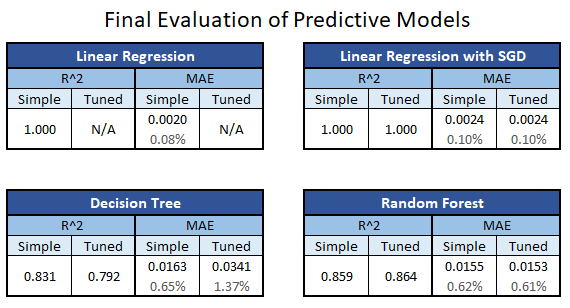

- The reasons why we have chosen Linear Regression model with SGD Regressor, even when without the SGD we identified better results, are:
 - It's a robust model that can be tuned, so we could get a better balance between [bias and variance](https://www.machinelearningplus.com/machine-learning/bias-variance-tradeoff/).
 - Its performance has a slight difference compared with Linear Regression..
 - It's the model recommended for [Scikit Learn](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).